In [30]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# read data
data = pd.read_csv("flights.csv",nrows=50000)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

In [4]:
# Drop unnecessary columns
data1 = data.drop(['FLIGHT_NUMBER','TAIL_NUMBER','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
                    'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY','DIVERTED','AIR_SYSTEM_DELAY',
                    'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','CANCELLATION_REASON'],axis = 1)

In [5]:
# Count the null value in each column
data1.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DISTANCE               0
SCHEDULED_ARRIVAL      0
CANCELLED              0
dtype: int64

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YEAR                 50000 non-null  int64 
 1   MONTH                50000 non-null  int64 
 2   DAY                  50000 non-null  int64 
 3   DAY_OF_WEEK          50000 non-null  int64 
 4   AIRLINE              50000 non-null  object
 5   ORIGIN_AIRPORT       50000 non-null  object
 6   DESTINATION_AIRPORT  50000 non-null  object
 7   SCHEDULED_DEPARTURE  50000 non-null  int64 
 8   DISTANCE             50000 non-null  int64 
 9   SCHEDULED_ARRIVAL    50000 non-null  int64 
 10  CANCELLED            50000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.2+ MB


In [8]:
# Change the representation of time
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin
        
data1['SCHEDULED_DEPARTURE'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data1['SCHEDULED_ARRIVAL'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)

In [9]:
data1.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'CANCELLED'],
      dtype='object')

In [10]:
data1['Date'] = pd.to_datetime(data1[['YEAR','MONTH','DAY']])
data1.Date

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
49995   2015-01-04
49996   2015-01-04
49997   2015-01-04
49998   2015-01-04
49999   2015-01-04
Name: Date, Length: 50000, dtype: datetime64[ns]

In [11]:
# Find day of the week
data1['Day'] = data1['Date'].dt.day_name()

In [12]:
# Created a new data set and drop unnecessary data
Flights = data1
Flights =Flights.drop(['YEAR','Date','DAY_OF_WEEK'],axis=1)

In [13]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                50000 non-null  int64 
 1   DAY                  50000 non-null  int64 
 2   AIRLINE              50000 non-null  object
 3   ORIGIN_AIRPORT       50000 non-null  object
 4   DESTINATION_AIRPORT  50000 non-null  object
 5   SCHEDULED_DEPARTURE  50000 non-null  object
 6   DISTANCE             50000 non-null  int64 
 7   SCHEDULED_ARRIVAL    50000 non-null  object
 8   CANCELLED            50000 non-null  int64 
 9   Day                  50000 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.8+ MB


In [14]:
Flights

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,Day
0,1,1,AS,ANC,SEA,00:05:00,1448,04:30:00,0,Thursday
1,1,1,AA,LAX,PBI,00:10:00,2330,07:50:00,0,Thursday
2,1,1,US,SFO,CLT,00:20:00,2296,08:06:00,0,Thursday
3,1,1,AA,LAX,MIA,00:20:00,2342,08:05:00,0,Thursday
4,1,1,AS,SEA,ANC,00:25:00,1448,03:20:00,0,Thursday
...,...,...,...,...,...,...,...,...,...,...
49995,1,4,AA,DFW,LAS,09:15:00,1055,10:10:00,0,Sunday
49996,1,4,AA,STX,MIA,09:15:00,1139,11:22:00,0,Sunday
49997,1,4,AS,DCA,LAX,09:15:00,2311,12:10:00,0,Sunday
49998,1,4,DL,ATL,ICT,09:15:00,782,10:40:00,0,Sunday


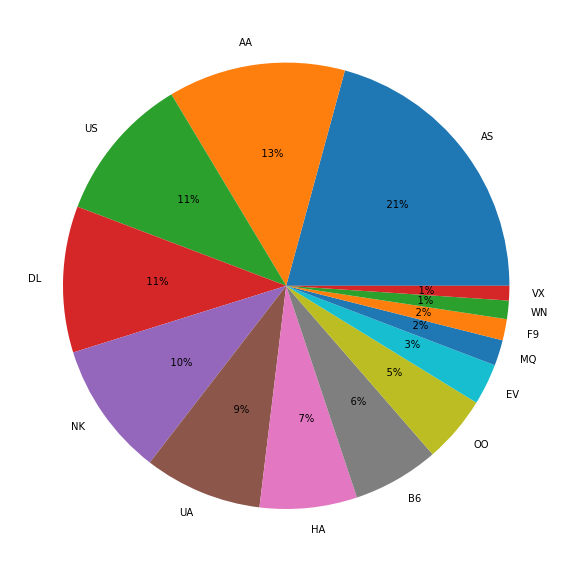

In [15]:
# Percentage of flights for each airline
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

# Prediction

In [16]:
# Function to encode nomial columns
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [17]:
# Function to process data, split data, and scale data
def preprocess_inputs(df):
    df = df.copy()    
    # One-hot encode nominal feature columns
    df = onehot_encode(
        df,
        column_dict={
            'AIRLINE': 'AL',
            'ORIGIN_AIRPORT': 'OA',
            'DESTINATION_AIRPORT': 'DA',
            'Day':'Day'
        }
    )
    # Split df into X and y
    y = df['CANCELLED'].copy()
    X = df.drop('CANCELLED', axis=1).copy()
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
   
    return X_train, X_test, y_train, y_test

In [18]:
Flights.columns

Index(['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'CANCELLED',
       'Day'],
      dtype='object')

In [19]:
# Model Names
LogR = LogisticRegression()
Lda = LinearDiscriminantAnalysis()
Svc = SVC()
KN = KNeighborsClassifier(n_neighbors=3)
Gaussian = GaussianNB()

In [20]:
#### Currently Drop Departure Time and Arrival Time (NEED CHANGE)

Flights =Flights.drop(['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL'],axis=1)
X_train, X_test, y_train, y_test = preprocess_inputs(Flights)

In [21]:
# Function to calcualte the accuracy of model and create confusion matrix
def evaluate_model(model, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc * 100))
    
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["NOT CANCELLED", "CANCELLED"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.yticks(np.arange(2) + 0.5, ["NOT CANCELLED", "CANCELLED"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Accuracy: 97.56%


C:\Users\wei99\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


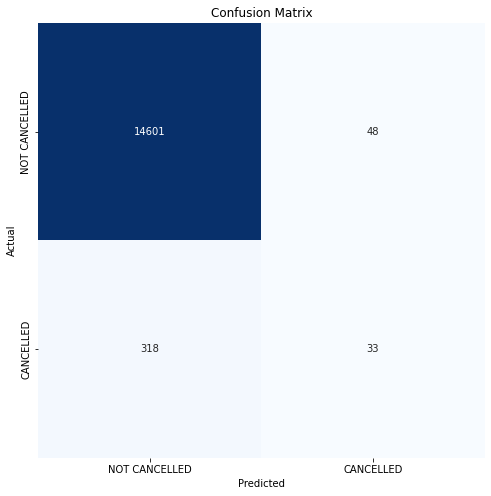

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99     14649
    CANCELLED       0.41      0.09      0.15       351

     accuracy                           0.98     15000
    macro avg       0.69      0.55      0.57     15000
 weighted avg       0.97      0.98      0.97     15000



In [22]:
# Logistic Regression Model
logistic_regression = LogR.fit(X_train, y_train)
evaluate_model(logistic_regression, X_test, y_test)

Test Accuracy: 96.72%


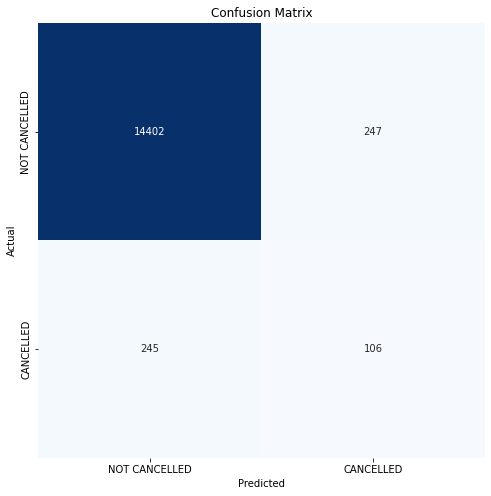

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.98      0.98      0.98     14649
    CANCELLED       0.30      0.30      0.30       351

     accuracy                           0.97     15000
    macro avg       0.64      0.64      0.64     15000
 weighted avg       0.97      0.97      0.97     15000



In [23]:
# Linear Discriminant Analysis Model
linear_discriminant = Lda.fit(X_train, y_train)
evaluate_model(linear_discriminant, X_test, y_test)

Test Accuracy: 97.60%


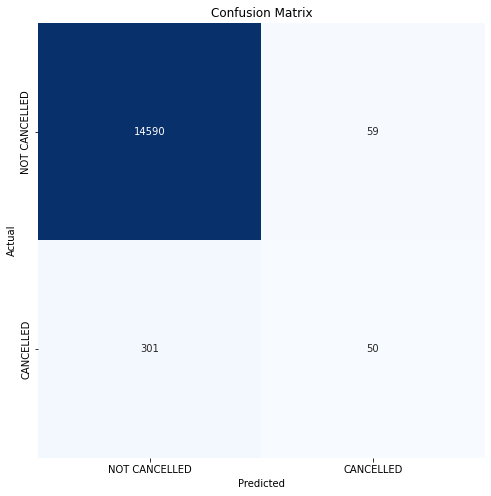

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99     14649
    CANCELLED       0.46      0.14      0.22       351

     accuracy                           0.98     15000
    macro avg       0.72      0.57      0.60     15000
 weighted avg       0.97      0.98      0.97     15000



In [24]:
# K Neighbors Classifier Model
KNeighbor = KN.fit(X_train, y_train)
evaluate_model(KNeighbor, X_test, y_test)

Test Accuracy: 21.20%


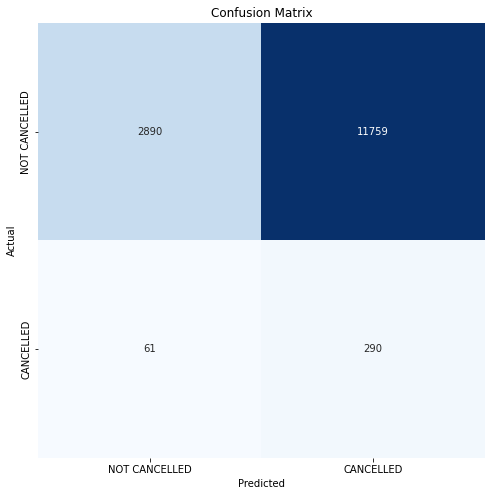

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.98      0.20      0.33     14649
    CANCELLED       0.02      0.83      0.05       351

     accuracy                           0.21     15000
    macro avg       0.50      0.51      0.19     15000
 weighted avg       0.96      0.21      0.32     15000



In [25]:
# Gaussian Naive Bayes Model
Gau = Gaussian.fit(X_train, y_train)
evaluate_model(Gau, X_test, y_test)

Test Accuracy: 97.65%


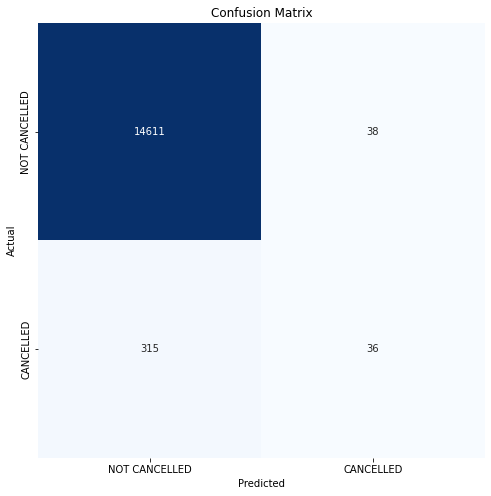

Classification Report:
----------------------
                precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99     14649
    CANCELLED       0.49      0.10      0.17       351

     accuracy                           0.98     15000
    macro avg       0.73      0.55      0.58     15000
 weighted avg       0.97      0.98      0.97     15000



In [26]:
# SVC Model
SVC = Svc.fit(X_train, y_train)
evaluate_model(SVC, X_test, y_test)

# Conclusion
The current best model is SVC model with a accuracy score of 97.65. Next step is to add weather to data to rerun the program and see what is the best model.
Instead of outputting a probability, this model classify the output to either 0 for no cancellation or 1 for cancellation.

In [31]:
# Save the model as a pickle in a file
joblib.dump(Svc, 'model.pkl')
 
# Load the model from the file
# model_from_joblib = joblib.load('model.pkl')
 
# Use the loaded model to make predictions
# model_from_joblib.predict(X_test)

['model.pkl']